In [3]:
import math
# Full IJS usage

def poly_coeff_from_roots(roots):
    coeffs = []
    
    # Go through all the roots
    n = len(roots)
    #print(n)
    
    # Generate the result Polynomial, which initially is set to -roots[0] + x :: index of the list can be seen as power of x
    coeffs.insert(0, (-1)*roots[0])
    coeffs.insert(1,1)
    
    # Continue multiplying -roots[i] + x
    i = 1
    while i < n:
        # right shift, equivalent to multiplying x, the index increased 1 as the result
        coeffs.insert(0,0)        
        j = 0
        while j < (len(coeffs) - 1):
            # mu
            coeffs[j] = coeffs[j] + coeffs[j+1] * (-1) * roots[i]
            j = j + 1

        i = i + 1
    return coeffs[::-1]  ## reverse list from highest power coefficient to lowest

#print(poly_coeff_from_roots([1,2,3,4,5]))
##################################################################################################################
def get_coeff_list(c, w, t, v):
    """
    c - sent coeffs
    w - secondary list at second device

    s, n,
    s - size of w ##### ## b
    n - window size for root selection (not used -- same as s) #### number of roots to generate s-(t/2)

    v - number of varations of roots 
    ### IMPORTANT: CAN ONLY CORRECT ONE ERROR or t/2 errors
    """
    ##################
    s = len(w)
    n = s 
    #print(c, w, s, n, t, v)
    ##################

    result = [] # coefficients found
    corr_seq = []
    #print(c)
    # # For range finding on second device (not used if window is fixed or full)
    #for i in range(0, s-n+1, 1):
        #r_w = w[i: i+n] # values of w in the window - to find root of... (should be full - in algo.)
    ### Indent if using range -- till before return
    r_w = w.copy()
    #print(r_w)
    for err_idx in range(n):
        removed_r = r_w[err_idx]
        k = int(math.pow((2 * v + 1), (n-1)))
        #print(k)
        while k > 0:
            temp_list = r_w.copy()
            temp_list.remove(removed_r)
            temp_variation = k - 1

            for l in range(n-1):
                temp_list[l] = temp_list[l] + (temp_variation % (2 * v + 1)) - v
                temp_variation = temp_variation // (2 * v + 1)
            #print(temp_list)
            residue_coeff = poly_coeff_from_roots(temp_list)
            #print(residue_coeff)
            addd_rt = (-1) * (c[1] - residue_coeff[1])
            temp_list.insert(err_idx,addd_rt)
            residue_coeff = poly_coeff_from_roots(temp_list)
            #print(residue_coeff)
            k = k - 1
            if(residue_coeff not in result):
                #print(residue_coeff)
                coeff_check = True
                for i_t in range(t): #+1 -1
                    if(c[i_t+1] != residue_coeff[i_t+1]): # or not coeff_check
                        coeff_check = False
                        break
                if(coeff_check):
                    corr_seq = temp_list
                    result.append(residue_coeff)
                # if(c[1] == residue_coeff[1] and c[2] == residue_coeff[2]):#  and c[3] == residue_coeff[3]):
                #     result.append(residue_coeff)
        ###
    print(corr_seq)
    return result

w_1 = [61, 25, 35, 12, 78, 90]#[1,2,3,4,5]#[61, 45, 42, 56, 48, 50]
w_2 = [61, 25, 35, 10, 77, 91]#[1,2,3,4,5]#[61, 45, 42, 56, 48, 50]

s = len(w_1)
t = math.ceil(s/2)#3 # -1... #### HOW TO DETERMINE t

sent_coeffs = poly_coeff_from_roots(w_1)[:t+1] #+1
print(poly_coeff_from_roots(w_1))
#print(poly_coeff_from_roots(w_1)[:t+1], poly_coeff_from_roots(w_1))

get_coeff_list(c=sent_coeffs, w=w_2, t=t, v=2) #int(s-(t))  s=s, n=s,

[1, -301, 35351, -2047271, 60778800, -864324900, 4496310000]
[61, 25, 35, 12, 78, 90]


[[1, -301, 35351, -2047271, 60778800, -864324900, 4496310000]]

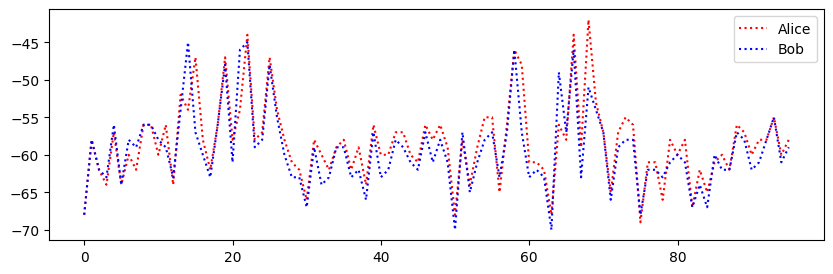

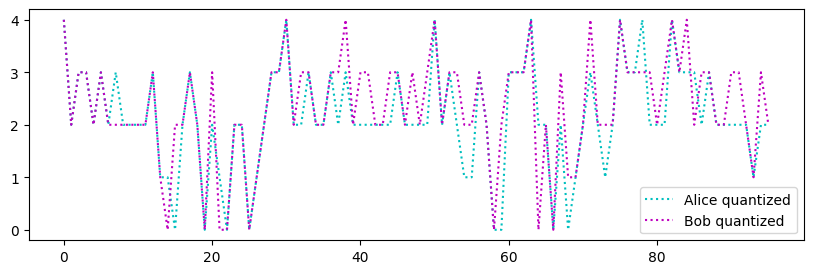

In [4]:
import matplotlib.pyplot as plt
samples=[[-68, -68], [-58, -58], [-62, -62], [-64, -63], [-57, -56], [-64, -64], [-60, -58], [-62, -59], [-56, -56], [-56, -56], [-60, -58], [-56, -59], [-64, -63], [-52, -54], [-54, -45], [-47, -57], [-58, -60], [-62, -63], [-56, -56], [-47, -48], [-58, -61], [-54, -46], [-44, -45], [-58, -59], [-57, -58], [-47, -48], [-54, -55], [-58, -60], [-61, -63], [-62, -63], [-66, -67], [-58, -59], [-60, -64], [-62, -63], [-59, -59], [-58, -59], [-62, -63], [-59, -62], [-64, -66], [-56, -57], [-60, -63], [-60, -62], [-57, -58], [-57, -59], [-60, -61], [-61, -62], [-56, -57], [-58, -61], [-56, -58], [-59, -61], [-68, -70], [-58, -57], [-64, -65], [-59, -61], [-55, -58], [-55, -57], [-65, -63], [-56, -57], [-46, -46], [-48, -57], [-61, -63], [-61, -62], [-62, -63], [-68, -70], [-56, -49], [-58, -57], [-44, -46], [-59, -63], [-42, -51], [-53, -54], [-57, -57], [-65, -66], [-57, -59], [-55, -58], [-56, -58], [-69, -68], [-61, -62], [-61, -62], [-66, -63], [-58, -61], [-60, -60], [-58, -61], [-67, -67], [-62, -64], [-65, -67], [-61, -60], [-60, -62], [-62, -62], [-56, -57], [-57, -58], [-60, -62], [-58, -61], [-58, -58], [-55, -55], [-60, -61], [-58, -59]]

alice = [x[0] for x in samples]
bob = [x[1] for x in samples]
plt.figure(figsize=(10,3))
plt.plot(alice, 'r:', label="Alice")
plt.plot(bob, 'b:', label="Bob")
plt.legend()
plt.show()

quantization_margins = [0, -50, -55, -60, -65, -128]

alice_q = []
for s in alice:
    for i in range(len(quantization_margins)-1):
        if(s<quantization_margins[i] and s>=quantization_margins[i+1]):
            alice_q.append(i)
bob_q = []
for s in bob:
    for i in range(len(quantization_margins)-1):
        if(s<quantization_margins[i] and s>=quantization_margins[i+1]):
            bob_q.append(i)

plt.figure(figsize=(10,3))
plt.plot(alice_q, 'c:', label="Alice quantized")
plt.plot(bob_q, 'm:', label="Bob quantized")
plt.legend()
plt.show()



[18, 15, 11, 11, 10, 10, 7, 2, 11, 4, 5, 2, 4, 6, 15, 18, 11, 10, 14, 14, 10, 10, 11, 10, 10, 18, 14, 3, 14, 0, 15, 28, 10, 2, 1, 11, 5, 20, 15, 18, 10, 19, 15, 11, 10, 10, 5, 10]
[18, 15, 11, 10, 10, 10, 7, 2, 11, 4, 6, 2, 4, 6, 15, 18, 15, 10, 15, 18, 15, 10, 15, 11, 11, 18, 15, 10, 14, 2, 15, 28, 2, 3, 3, 20, 10, 20, 15, 15, 11, 19, 18, 15, 10, 15, 5, 14]


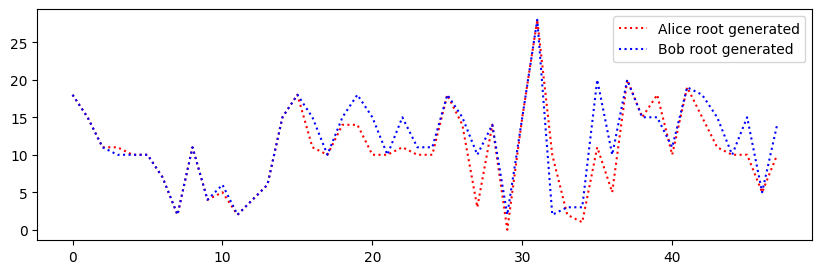

[4, 6, 15, 18, 11, 10] [4, 6, 15, 18, 15, 10]
[1, -64, 1637, -21326, 148452, -520200, 712800] [1, -64, 1637, -21326]
[4, 6, 10, 18, 15, 11]


[[1, -64, 1637, -21326, 148452, -520200, 712800]]

In [5]:
window = 2
alice_roots = []
for i in range(0, len(alice_q), window):
    sequence = alice_q[i: i+window]
    binary_string = ''.join(format(num, 'b') for num in sequence)
    alice_root = int(binary_string, 2)
    alice_roots.append(alice_root)
print(alice_roots)

bob_roots = []
for i in range(0, len(bob_q), window):
    sequence = bob_q[i: i+window]
    binary_string = ''.join(format(num, 'b') for num in sequence)
    bob_root = int(binary_string, 2)
    bob_roots.append(bob_root)
print(bob_roots)

plt.figure(figsize=(10,3))
plt.plot(alice_roots, 'r:', label="Alice root generated")
plt.plot(bob_roots, 'b:', label="Bob root generated")
plt.legend()
plt.show()

##########################################

i = 12
window = 6
w_1 = alice_roots[i:i+window]
w_2 = bob_roots[i:i+window]

print(w_1, w_2)
s = len(w_1)
t = 3 #### HOW TO DETERMINE t (number of coeffs after 1 to share with second device)

#print(w_1, w_2)

sent_coeffs = poly_coeff_from_roots(w_1)[:t+1]
print(poly_coeff_from_roots(w_1), sent_coeffs)

get_coeff_list(c=sent_coeffs, w=w_2, t=t, v=2)

___


# Complete Usage

In [64]:
import numpy as np

def spline_projection(seq):
    projected_seq = []
    for i in range(1, len(alice)-1, 1):
        A = np.array(
            [[(i-1)**3, (i-1)**2, (i-1)**1, 1, 0, 0, 0, 0],
            [0, 0, 0, 0, i**3, i**2, i**1, 1],
            [i**3, i**2, i**1, 1, 0, 0, 0, 0],
            [(i+1)**3, (i+1)**2, (i+1)**1, 1, 0, 0, 0, 0],
            [3*i**2, 2*i, 1, 0, -3*i**2, -2*i, -1, 0],
            [6*i, 2, 0, 0, -6*i, -2, 0, 0],
            [6*(i-1), 2, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 6*(i+1), 2, 0, 0]]
        )
        b = np.array([seq[i-1], seq[i], seq[i], seq[i+1], 0, 0, 0, 0])
        coeff = np.dot(np.linalg.inv(A), b)
        
        #print(np.linalg.det(A))
        #print(np.dot(np.linalg.inv(A), b))
        #print(i)

        k = i+2
        # projected cubic eq.
        projected_seq.append( round(coeff[0]*k**3 + coeff[1]*k**2 + coeff[2]*k**1 + coeff[3]) )
        #projected_seq.append( round(coeff[4]*k**3 + coeff[5]*k**2 + coeff[6]*k**1 + coeff[7]) )
    return projected_seq

# print(spline_projection(alice))
# print()
# print(spline_projection(bob))

In [65]:
print(len(spline_projection(alice)), len(alice))

8 10


sgn(x)ln(1+A)ln(1+A∣x∣)​

In [66]:
#d = [-94, -62, -32, -99, -34, -76, -34, -68]
def quantization_m(data, m):
    data = np.array(data)
    quant_seq = []

    variance = (1/len(data)) * np.sum(data**2)
    norm_x = data/np.sqrt(variance)
    
    x_min = min(norm_x)
    x_max = max(norm_x)

    delta = (x_max-x_min)/m

    for x in norm_x:
        lvls = np.arange(x_min, x_max+1, delta)
        for i in range(1,len(lvls)):
            if(x>=lvls[i-1] and x<=lvls[i]):
                #print(i)
                quant_seq.append(i)
                break
    return quant_seq

#quantization_m(d, 4)

In [67]:
# DISCARDED - BAD VARIANCE
# def quantization_percent(data, m):
#     #m = int((len(data)/2)) #int((len(data)/2)+2)
#     #print(m, len(data))
#     quantiles = np.percentile(data, np.linspace(0, 100, m + 1), method='inverted_cdf')
#     #print(quantiles)
#     ranges = []
#     for i in range(len(quantiles) - 1):
#         ranges.append((quantiles[i], quantiles[i + 1]))

#     number_ranges = []
#     for num in data:
#         for i, (start, end) in enumerate(ranges):
#             if start <= num <= end:
#                 number_ranges.append((num, i + 1)) 
#                 break

#     quant_seq = []
#     for num, rng in number_ranges:
#         #print(format(rng, f'0{round(m/2)-1}b')) #int
#         #print(rng)
#         quant_seq.append(rng)
#     return quant_seq

96
90
Projected:  [-94, -62, -32, -99, -34, -76, -34, -68] [-94, -58, -33, -102, -24, -74, -45, -62]
Quantized:  [2, 9, 16, 1, 16, 6, 16, 8] [2, 10, 15, 1, 16, 6, 12, 9]
Alice Sent Coeffs.:  [1, -74, 2261, -36824, 344300]
[1, 8, 16, 2, 16, 6, 16, 9]
[[1, -74, 2261, -36824, 344300, -1851296, 5400064, -7397376, 3538944]]
-------------------------------
Projected:  [-96, 0, -84, -22, -105, -52, -30, -32] [-73, -19, -36, -111, -45, -66, -29, -38]
Quantized:  [2, 17, 4, 13, 1, 9, 12, 12] [7, 16, 14, 1, 12, 8, 15, 13]
Alice Sent Coeffs.:  [1, -70, 2026, -31276, 276661]
[]
[]
-------------------------------
Projected:  [-22, -120, -26, -19, -95, -56, -62, -59] [-72, -103, -27, -20, -96, -61, -62, -57]
Quantized:  [16, 1, 15, 16, 4, 11, 10, 10] [6, 1, 15, 17, 2, 9, 8, 9]
Alice Sent Coeffs.:  [1, -83, 2907, -55673, 630292]
[15, 1, 16, 16, 4, 10, 10, 11]
[[1, -83, 2907, -55673, 630292, -4240884, 16041040, -29273600, 16896000]]
-------------------------------
Projected:  [-82, -64, -46, -61, -76,

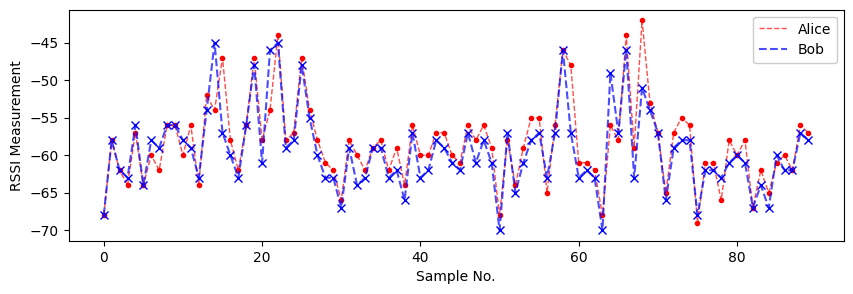

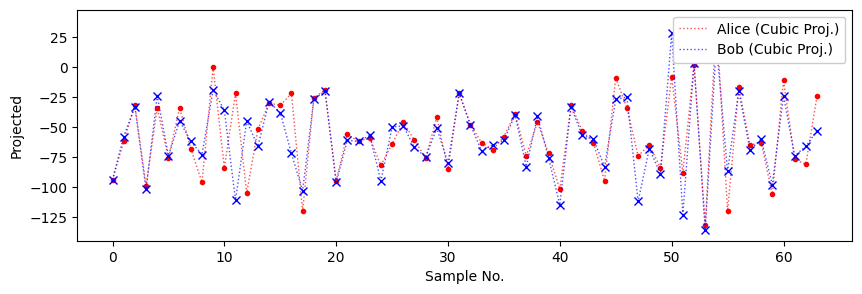

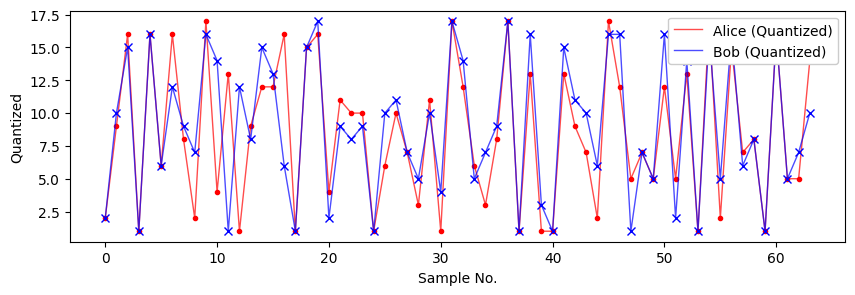

In [107]:
samples=[[-68, -68], [-58, -58], [-62, -62], [-64, -63], [-57, -56], [-64, -64], [-60, -58], [-62, -59], [-56, -56], [-56, -56], [-60, -58], [-56, -59], [-64, -63], [-52, -54], [-54, -45], [-47, -57], [-58, -60], [-62, -63], [-56, -56], [-47, -48], [-58, -61], [-54, -46], [-44, -45], [-58, -59], [-57, -58], [-47, -48], [-54, -55], [-58, -60], [-61, -63], [-62, -63], [-66, -67], [-58, -59], [-60, -64], [-62, -63], [-59, -59], [-58, -59], [-62, -63], [-59, -62], [-64, -66], [-56, -57], [-60, -63], [-60, -62], [-57, -58], [-57, -59], [-60, -61], [-61, -62], [-56, -57], [-58, -61], [-56, -58], [-59, -61], [-68, -70], [-58, -57], [-64, -65], [-59, -61], [-55, -58], [-55, -57], [-65, -63], [-56, -57], [-46, -46], [-48, -57], [-61, -63], [-61, -62], [-62, -63], [-68, -70], [-56, -49], [-58, -57], [-44, -46], [-59, -63], [-42, -51], [-53, -54], [-57, -57], [-65, -66], [-57, -59], [-55, -58], [-56, -58], [-69, -68], [-61, -62], [-61, -62], [-66, -63], [-58, -61], [-60, -60], [-58, -61], [-67, -67], [-62, -64], [-65, -67], [-61, -60], [-60, -62], [-62, -62], [-56, -57], [-57, -58], [-60, -62], [-58, -61], [-58, -58], [-55, -55], [-60, -61], [-58, -59]]
#[[-56, -55], [-58, -56], [-61, -61], [-55, -47], [-59, -59], [-57, -58], [-56, -53], [-54, -55], [-53, -52], [-61, -60], [-57, -56], [-57, -55], [-45, -43], [-55, -56], [-56, -55], [-51, -43], [-54, -46], [-44, -44], [-55, -55], [-45, -52], [-45, -44], [-53, -46], [-56, -56], [-59, -59], [-60, -58], [-58, -57], [-58, -57], [-67, -64], [-56, -56], [-66, -63], [-59, -58], [-62, -63], [-54, -53], [-62, -65], [-58, -58], [-60, -58], [-56, -57], [-68, -68], [-59, -59], [-56, -56], [-60, -60], [-61, -64], [-61, -62], [-60, -62], [-60, -61], [-59, -59], [-63, -65], [-65, -68], [-55, -58], [-68, -66], [-56, -56], [-57, -60], [-58, -61], [-64, -68], [-62, -64], [-55, -56], [-52, -56], [-57, -59], [-57, -59], [-55, -55], [-53, -56], [-54, -56], [-61, -62], [-62, -64], [-55, -58], [-66, -66], [-63, -63], [-57, -58], [-57, -57], [-58, -58], [-60, -63], [-47, -56], [-57, -60], [-44, -46], [-55, -56], [-64, -69], [-55, -57], [-55, -56], [-60, -61], [-60, -60], [-59, -60], [-61, -61], [-70, -68], [-68, -73], [-61, -63], [-64, -63], [-59, -58], [-60, -59], [-66, -71], [-62, -62], [-61, -62], [-56, -57], [-56, -58], [-52, -47], [-63, -63], [-57, -60], [-58, -61]]
#[[-45, -44], [-43, -42], [-54, -54], [-60, -60], [-55, -55], [-64, -63], [-56, -55], [-53, -44], [-43, -42], [-51, -45], [-45, -47], [-56, -57], [-56, -57], [-43, -43], [-58, -58], [-52, -46], [-52, -45], [-44, -45], [-58, -60], [-62, -64], [-61, -62], [-57, -58], [-69, -70], [-61, -62], [-59, -60], [-57, -59], [-66, -67], [-59, -60], [-47, -48], [-60, -61], [-59, -61], [-61, -63], [-58, -58], [-58, -59], [-57, -57], [-64, -67], [-64, -64], [-62, -63], [-57, -59], [-63, -63], [-58, -58], [-59, -62], [-61, -60], [-61, -66], [-57, -58], [-61, -59], [-46, -55], [-60, -61], [-59, -60], [-56, -59], [-61, -60], [-43, -54], [-52, -54], [-56, -58], [-53, -55], [-56, -57], [-57, -59], [-45, -46], [-57, -59], [-57, -58], [-58, -61], [-52, -53], [-48, -55], [-53, -56], [-59, -62], [-59, -61], [-57, -61], [-62, -61], [-60, -65], [-73, -66], [-59, -58], [-57, -60], [-64, -67], [-63, -66], [-55, -56], [-56, -58], [-65, -66], [-61, -60], [-67, -69], [-65, -66], [-59, -60], [-60, -61], [-55, -49], [-64, -65], [-56, -57], [-65, -67], [-59, -60], [-56, -46], [-62, -64], [-57, -59], [-55, -56], [-58, -58], [-47, -56]]
#[[-68, -68], [-58, -58], [-62, -62], [-64, -63], [-57, -56], [-64, -64], [-60, -58], [-62, -59], [-56, -56], [-56, -56], [-60, -58], [-56, -59], [-64, -63], [-52, -54], [-54, -45], [-47, -57], [-58, -60], [-62, -63], [-56, -56], [-47, -48], [-58, -61], [-54, -46], [-44, -45], [-58, -59], [-57, -58], [-47, -48], [-54, -55], [-58, -60], [-61, -63], [-62, -63], [-66, -67], [-58, -59], [-60, -64], [-62, -63], [-59, -59], [-58, -59], [-62, -63], [-59, -62], [-64, -66], [-56, -57], [-60, -63], [-60, -62], [-57, -58], [-57, -59], [-60, -61], [-61, -62], [-56, -57], [-58, -61], [-56, -58], [-59, -61], [-68, -70], [-58, -57], [-64, -65], [-59, -61], [-55, -58], [-55, -57], [-65, -63], [-56, -57], [-46, -46], [-48, -57], [-61, -63], [-61, -62], [-62, -63], [-68, -70], [-56, -49], [-58, -57], [-44, -46], [-59, -63], [-42, -51], [-53, -54], [-57, -57], [-65, -66], [-57, -59], [-55, -58], [-56, -58], [-69, -68], [-61, -62], [-61, -62], [-66, -63], [-58, -61], [-60, -60], [-58, -61], [-67, -67], [-62, -64], [-65, -67], [-61, -60], [-60, -62], [-62, -62], [-56, -57], [-57, -58], [-60, -62], [-58, -61], [-58, -58], [-55, -55], [-60, -61], [-58, -59]]


cubic_A_all = []
cubic_B_all = []

quant_A_all = []
quant_B_all = []

window = 10
print(len(samples))
samples = samples[:(int(len(samples)/window)*window)] ## To assert even division based on window 
print(len(samples))

for i in range(0, len(samples)-window, window):
    alice = [x[0] for x in samples][i:i+window]
    bob = [x[1] for x in samples][i:i+window]
    #print(alice, bob)

    c_A = spline_projection(alice)
    c_B = spline_projection(bob)
    cubic_A_all.append(c_A)
    cubic_B_all.append(c_B)
    print("Projected: ", c_A, c_B)

    # quantization
    q_A = quantization_m(c_A, (len(c_A)*2))
    q_B = quantization_m(c_B, (len(c_B)*2))
    quant_A_all.append(q_A)
    quant_B_all.append(q_B)
    print("Quantized: ", q_A, q_B)

    # Alice - JS encoding
    alice_coeffs = poly_coeff_from_roots(q_A)        #[:t+1]
    t = int(len(alice_coeffs)/2)
    #print(poly_coeff_from_roots(q_A), alice_coeffs)
    print("Alice Sent Coeffs.: ", alice_coeffs[:t+1])

    # Bob - JS decoding
    # q_B _> quantized vals at bob
    print(get_coeff_list(c=alice_coeffs[:t+1], w=q_B, t=t, v=2)) # v is variations inside the decoder
    print("-------------------------------")

alice = [x[0] for x in samples]
bob = [x[1] for x in samples]

plt.figure(figsize=(10, 3))
plt.plot(alice, 'r--', label="Alice", linewidth=1, alpha=0.7)
plt.plot(alice, 'r.')
plt.plot(bob, 'b--', label="Bob", alpha=0.7)
plt.plot(bob, 'bx')
plt.xlabel("Sample No.")
plt.ylabel("RSSI Measurement")
plt.legend(framealpha=1, loc="upper right")
plt.show()

plt.figure(figsize=(10, 3))
plt.plot(np.array(cubic_A_all).flatten(), 'r:', label="Alice (Cubic Proj.)", linewidth=1, alpha=0.7)
plt.plot(np.array(cubic_A_all).flatten(), 'r.')
plt.plot(np.array(cubic_B_all).flatten(), 'b:', label="Bob (Cubic Proj.)", linewidth=1, alpha=0.7)
plt.plot(np.array(cubic_B_all).flatten(), 'bx')
plt.xlabel("Sample No.")
plt.ylabel("Projected")
plt.legend(framealpha=1, loc="upper right")
plt.show()

# print(quant_A_all)
# print(quant_B_all)
plt.figure(figsize=(10, 3))
plt.plot(np.array(quant_A_all).flatten(), 'r-', label="Alice (Quantized)", linewidth=1, alpha=0.7)
plt.plot(np.array(quant_A_all).flatten(), 'r.')
plt.plot(np.array(quant_B_all).flatten(), 'b-', label="Bob (Quantized)", linewidth=1, alpha=0.7)
plt.plot(np.array(quant_B_all).flatten(), 'bx')

plt.xlabel("Sample No.")
plt.ylabel("Quantized")
plt.legend(framealpha=1, loc="upper right")
plt.show()

In [119]:
import numpy as np
def pearson_corr_2d(list1, list2):
    i = 0
    corr_list = []
    for l1, l2 in zip(list1, list2):
        i+=1
        #print(l1, l2)
        xs = np.array(l1) #(list1)
        ys = np.array(l2) #(list2)

        _x = sum(xs) / len(xs)
        _y = sum(ys) / len(ys)
        
        summation = sum((x - _x) * (y - _y) for x, y in zip(xs, ys))# / len(list1)

        div_x = np.sum((xs-_x)**2)      #(sum([(x-_x)**2 for x in xs]))
        div_y = np.sum((ys-_y)**2)      #(sum([(y-_y)**2 for y in ys]))

        divisor = (div_x**0.5 * div_y**0.5)
        if(divisor == 0):
            pearson_correlation_coeff = 0.0
        else:
            pearson_correlation_coeff = summation/divisor
        #PCC at step {i} 
        corr_list.append(pearson_correlation_coeff)
        #print(f"& {pearson_correlation_coeff:.4f}") 
    return corr_list

def pearson_corr(list1, list2):
    xs = np.array(list1)
    ys = np.array(list2)

    _x = sum(xs) / len(xs)
    _y = sum(ys) / len(ys)
    
    summation = sum((x - _x) * (y - _y) for x, y in zip(xs, ys))# / len(list1)

    div_x = np.sum((xs-_x)**2)      #(sum([(x-_x)**2 for x in xs]))
    div_y = np.sum((ys-_y)**2)      #(sum([(y-_y)**2 for y in ys]))

    divisor = (div_x**0.5 * div_y**0.5)
    if(divisor == 0):
        pearson_correlation_coeff = 0.0
    else:
        pearson_correlation_coeff = summation/divisor
    #print(f"& {pearson_correlation_coeff:.4f}")
    #print(f"PCC - Formula result: {pearson_correlation_coeff}") 
    return pearson_correlation_coeff
    

print(pearson_corr(alice, bob))
print()
print(pearson_corr(np.array(cubic_A_all).flatten(), np.array(cubic_B_all).flatten()))
print()
print(pearson_corr(np.array(quant_A_all).flatten(), np.array(quant_B_all).flatten()))

print()
print()
pcc_cubic = pearson_corr_2d(np.array(cubic_A_all), np.array(cubic_B_all))
pcc_quant = pearson_corr_2d(np.array(quant_A_all), np.array(quant_B_all))
pcc_list = []
for p,q in zip(pcc_cubic, pcc_quant):
    pcc_list.append(f" & {p:.4f} & {q:.4f}")
print()




0.9398203744682484

0.811466266406613

0.8087961641965289





In [120]:
pcc_ab = []
for i in range(0, len(samples)-window, window):
    alice = [x[0] for x in samples][i:i+window]
    bob   = [x[1] for x in samples][i:i+window]
    pcc_ab.append(pearson_corr(alice, bob))
#print(len(pcc_ab))
#print(len(pcc_list))
for i in range(len(pcc_ab)):
    pcc_list[i] = f"{i+1} & {pcc_ab[i]:.4f}" + " " + pcc_list[i] + " \\\\ \hline"
    print(pcc_list[i])

1 & 0.9659  & 0.9734 & 0.9689 \\ \hline
2 & 0.6756  & 0.0966 & 0.1094 \\ \hline
3 & 0.9010  & 0.8433 & 0.8110 \\ \hline
4 & 0.9347  & 0.9289 & 0.9514 \\ \hline
5 & 0.9228  & 0.9642 & 0.9609 \\ \hline
6 & 0.9063  & 0.8920 & 0.8971 \\ \hline
7 & 0.8739  & 0.9283 & 0.9344 \\ \hline
8 & 0.9398  & 0.9370 & 0.9477 \\ \hline
